In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [14]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":61.21,"feels_like":61.27,"temp_min":58.28,"temp_max":63.61,"pressure":1021,"humidity":90},"visibility":10000,"wind":{"speed":1.99,"deg":0,"gust":4},"clouds":{"all":40},"dt":1633994576,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1633949552,"sunset":1633990137},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 61.21,
  'feels_like': 61.27,
  'temp_min': 58.28,
  'temp_max': 63.61,
  'pressure': 1021,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 0, 'gust': 4},
 'clouds': {'all': 40},
 'dt': 1633994576,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1633949552,
  'sunset': 1633990137},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [24]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
description = boston_data["weather"][0]["description"]
print(lat, lng, max_temp, humidity, clouds, wind, description)

42.3584 -71.0598 63.61 90 40 1.99 scattered clouds


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 10, 7, 16, 50, 26)

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | taltal
Processing Record 4 of Set 1 | guerrero
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | worland
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | rafsanjan
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | pauini
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | mandurah
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | luwuk
Processing Record 20 of Set 1 | matara
Processing Record 21 of Set 1 | shyroke
Processing Record 22 of Set 1 | arr

Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | owando
Processing Record 42 of Set 4 | berlevag
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | ishurdi
Processing Record 47 of Set 4 | bachaquero
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | umm kaddadah
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | wilmington
Processing Record 5 of Set 5 | kazachinskoye
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | coihaique
Processing Record 8 of Set 5 | sydney
Processing Record 9 of Set 5 | zhangye
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | lolua
City not found. Skipping...
Processing Re

Processing Record 31 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 32 of Set 8 | raudeberg
Processing Record 33 of Set 8 | langarud
Processing Record 34 of Set 8 | moyale
Processing Record 35 of Set 8 | tura
Processing Record 36 of Set 8 | bengkulu
Processing Record 37 of Set 8 | rosita
Processing Record 38 of Set 8 | alihe
Processing Record 39 of Set 8 | santa isabel do rio negro
Processing Record 40 of Set 8 | superior
Processing Record 41 of Set 8 | kristiansund
Processing Record 42 of Set 8 | ende
Processing Record 43 of Set 8 | abbeville
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | blumberg
Processing Record 46 of Set 8 | noumea
Processing Record 47 of Set 8 | abu zabad
Processing Record 48 of Set 8 | zambezi
Processing Record 49 of Set 8 | pitimbu
Processing Record 50 of Set 8 | hobyo
Processing Record 1 of Set 9 | saint anthony
Processing Record 2 of Set 9 | cuxhaven
Processing Record 3 of Set 9 | carbondale
Processing Record 4

Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | byron bay
Processing Record 22 of Set 12 | virginia beach
Processing Record 23 of Set 12 | yerbogachen
Processing Record 24 of Set 12 | grafton
Processing Record 25 of Set 12 | ondjiva
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | sobolevo
Processing Record 28 of Set 12 | santa isabel
Processing Record 29 of Set 12 | kemin
Processing Record 30 of Set 12 | caravelas
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Processing Record 32 of Set 12 | sivas
Processing Record 33 of Set 12 | bagotville
Processing Record 34 of Set 12 | meulaboh
Processing Record 35 of Set 12 | san isidro
Processing Record 36 of Set 12 | saint-francois
Processing Record 37 of Set 12 | morgantown
Processing Record 38 of Set 12 | cuencame
Processing Record 39 of Set 12 | tiarei
Processing Record 40 of Set 12 | oga
Processing Record 41 of Set 12 | diffa
Proc

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,62.65,92,23,0.87,US,2021-10-08 03:01:23
1,Nikolskoye,59.7035,30.7861,50.88,67,100,6.42,RU,2021-10-08 03:01:23
2,Taltal,-25.4000,-70.4833,57.18,82,100,4.29,CL,2021-10-08 03:01:23
3,Guerrero,17.6667,-100.0000,67.03,92,85,2.71,MX,2021-10-08 03:01:24
4,Georgetown,5.4112,100.3354,84.13,84,20,1.01,MY,2021-10-08 03:01:24
5,Worland,44.0169,-107.9554,63.88,45,90,3.00,US,2021-10-08 03:01:25
6,Rafsanjan,30.4067,55.9939,69.15,22,0,6.31,IR,2021-10-08 03:01:25
7,Albany,42.6001,-73.9662,59.54,93,34,1.41,US,2021-10-08 03:00:29
8,Pauini,-7.7136,-66.9764,79.61,71,85,1.54,BR,2021-10-08 03:01:26
9,Ushuaia,-54.8000,-68.3000,46.06,46,75,17.27,AR,2021-10-08 02:57:57


In [22]:
updated_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[updated_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-10-08 03:01:23,41.3712,-73.4140,62.65,92,23,0.87
1,Nikolskoye,RU,2021-10-08 03:01:23,59.7035,30.7861,50.88,67,100,6.42
2,Taltal,CL,2021-10-08 03:01:23,-25.4000,-70.4833,57.18,82,100,4.29
3,Guerrero,MX,2021-10-08 03:01:24,17.6667,-100.0000,67.03,92,85,2.71
4,Georgetown,MY,2021-10-08 03:01:24,5.4112,100.3354,84.13,84,20,1.01
5,Worland,US,2021-10-08 03:01:25,44.0169,-107.9554,63.88,45,90,3.00
6,Rafsanjan,IR,2021-10-08 03:01:25,30.4067,55.9939,69.15,22,0,6.31
7,Albany,US,2021-10-08 03:00:29,42.6001,-73.9662,59.54,93,34,1.41
8,Pauini,BR,2021-10-08 03:01:26,-7.7136,-66.9764,79.61,71,85,1.54
9,Ushuaia,AR,2021-10-08 02:57:57,-54.8000,-68.3000,46.06,46,75,17.27


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


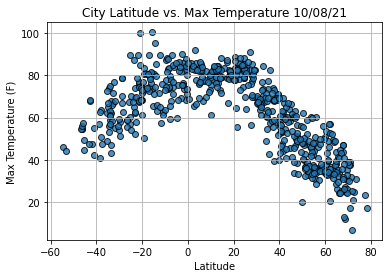

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

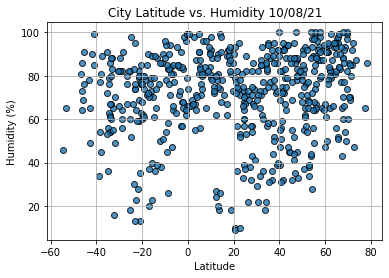

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

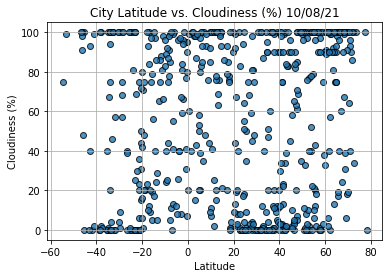

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

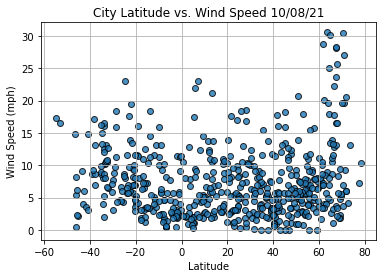

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

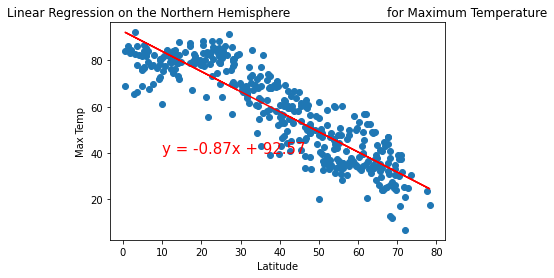

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

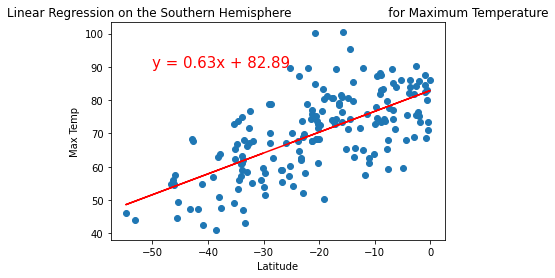

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

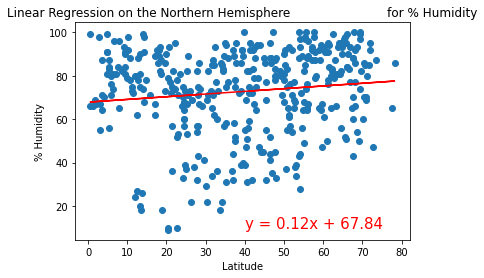

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

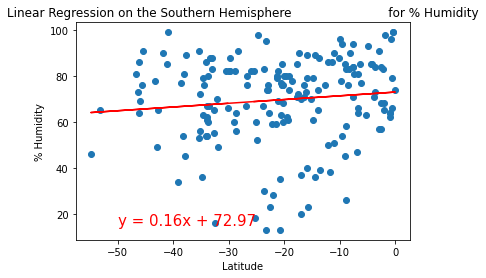

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

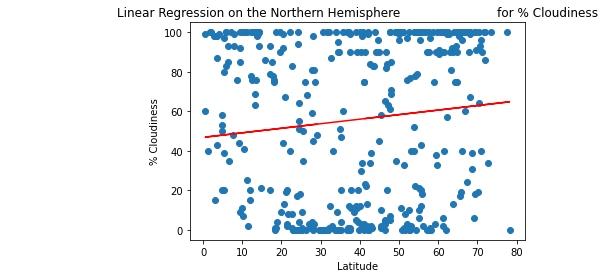

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

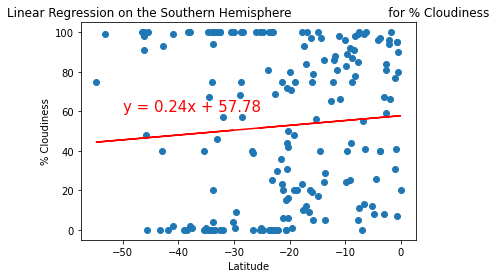

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

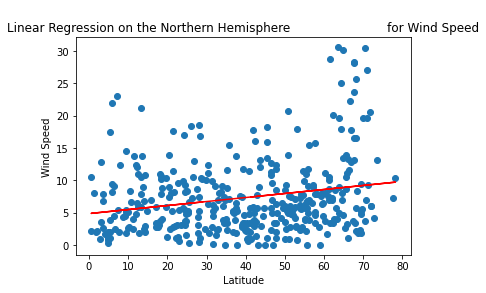

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

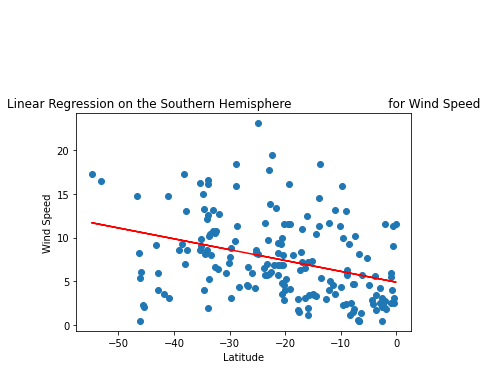

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))